In [1]:
import pandas as pd
import numpy as np
import re

from sklearn.cluster import KMeans

import nltk #natural language toolkit
# nltk.download('stopwords') #needed to downlaod once
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

df = pd.read_csv("nlp-dataset.csv")

sentences = #df["text"] 

# nltk.download('punkt') #needed to download once
# nltk.download('wordnet') #needed to download once
# nltk.download('omw-1.4') #needed to download once

corpus = []

for sentence in sentences:
    
    sentence = sentence.lower()
    
    # essentially split into words
    words = word_tokenize(sentence)
    
    #Stemming - also switches to root word, also ensures no stopwords 
    words = [stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
    
    #Lemmatize - swich word to base root word
    words = [lemmatizer.lemmatize(word) for word in words]
    
    sentence = ' '.join(words)
    
    corpus.append(sentence)
    
print(corpus)

['past john like sport like sport polit', 'sam like polit fan music polit', 'sara like book polit past read book', 'robert love book natur read book', 'linda like book sport like sport', 'alison use love natur current like natur sport']


C:\Users\amar3\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


cant do anything about the above warning message, the code still runs
We get value of k = 4


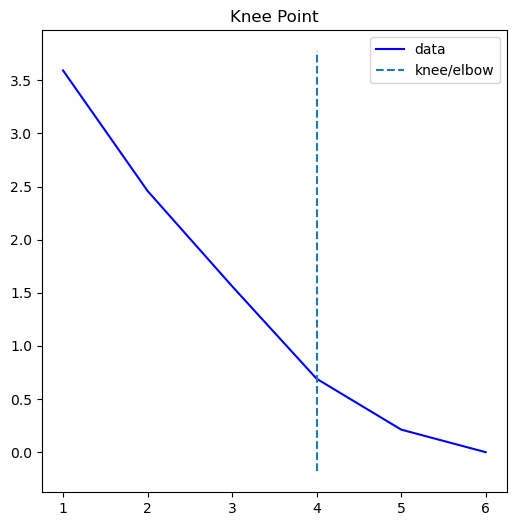

In [290]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from kneed import KneeLocator #after installing kneed

v = TfidfVectorizer(norm='l2', max_features=13) #only take top 10 features
tfidf = v.fit_transform(corpus)

#X = pd.DataFrame(tfidf.toarray(), columns=v.get_feature_names_out()).iloc[:,:].values

X = tfidf.toarray() # this extracts the values that were calculated via the funtions

#6 entries, max 6 clusters
sse = np.array([0.0]*6) #need floats bc rounding error
k = [i for i in range(1,7)]

#cant do anything about the error message
for i in range(1,7):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit_predict(X)
    sse[i-1] = kmeans.inertia_

print('cant do anything about the above warning message, the code still runs')
    
#print(k, sse)

elbow = KneeLocator(k, sse, curve='convex',direction='decreasing')
elbow.plot_knee()

k = elbow.elbow
print('We get value of k = 4')

List of features:
['alison' 'book' 'current' 'fan' 'john' 'like' 'linda' 'love' 'music'
 'natur' 'past' 'polit' 'read' 'robert' 'sam' 'sara' 'sport' 'use']

Clusters: [1 2 0 0 1 3]



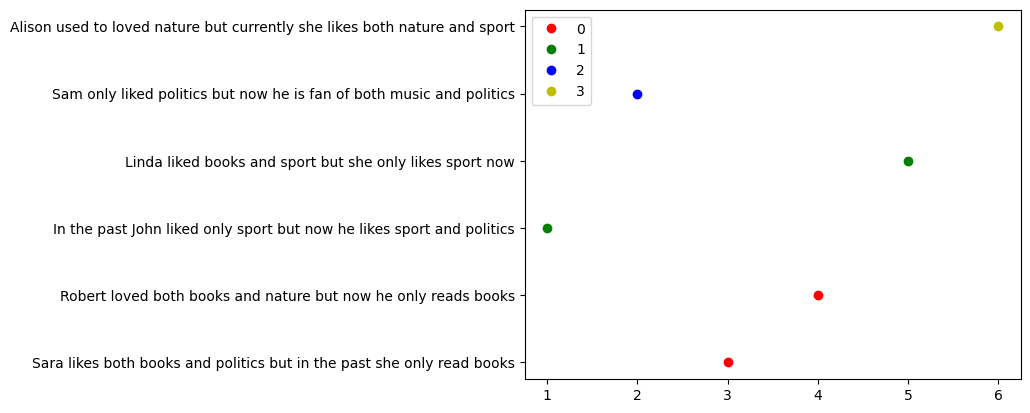

In [278]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

v = TfidfVectorizer(use_idf=False, norm='l2') #just TF
tf = v.fit_transform(corpus)

X = tf.toarray()

print("List of features:")
print(v.get_feature_names_out())
print()

kmeans_tf = KMeans(n_clusters=k, init='k-means++', random_state=42)
y_kmeans = kmeans_tf.fit_predict(X)

X = df.iloc[:].values

df['cluster'] = y_kmeans

print("Clusters:", y_kmeans)
print()

#print(df, X)

plt.plot(X[y_kmeans==0, 0], X[y_kmeans==0, 1], "ro", label="0")
plt.plot(X[y_kmeans==1, 0], X[y_kmeans==1, 1], "go", label="1")
plt.plot(X[y_kmeans==2, 0], X[y_kmeans==2, 1], "bo", label="2")
plt.plot(X[y_kmeans==3, 0], X[y_kmeans==3, 1], "yo", label="3")
plt.legend()
plt.show()

For TF clustering:

1 ['In', 'the', 'past', 'John', 'liked', 'only', 'sport', 'but', 'now', 'he', 'likes', 'sport', 'and', 'politics', 'Linda', 'liked', 'books', 'and', 'sport', 'but', 'she', 'only', 'likes', 'sport', 'now']
2 ['Sam', 'only', 'liked', 'politics', 'but', 'now', 'he', 'is', 'fan', 'of', 'both', 'music', 'and', 'politics']
0 ['Sara', 'likes', 'both', 'books', 'and', 'politics', 'but', 'in', 'the', 'past', 'she', 'only', 'read', 'books', 'Robert', 'loved', 'both', 'books', 'and', 'nature', 'but', 'now', 'he', 'only', 'reads', 'books']
3 ['Alison', 'used', 'to', 'loved', 'nature', 'but', 'currently', 'she', 'likes', 'both', 'nature', 'and', 'sport']


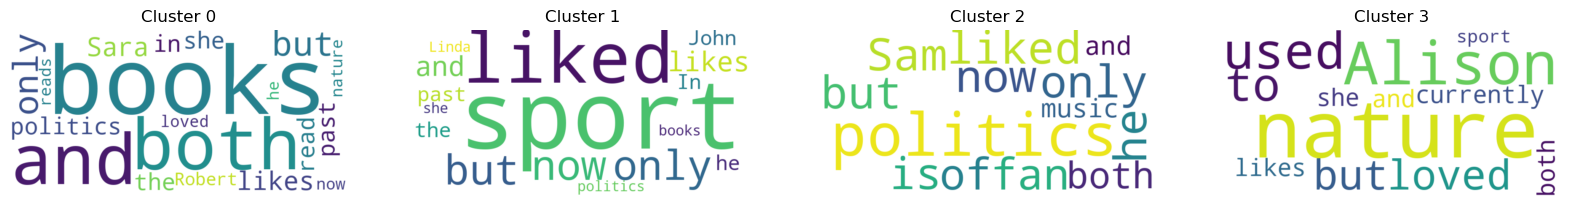

In [279]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

cluster_words = {} #{cluster# : [words in cluster]}

# Loop through each sentence and its cluster label
for sentence, cluster_label in zip(sentences, y_kmeans):

    # Add the words in the sentence to the list (ensure list exists), Counter will get frequency later
    words = cluster_words.get(cluster_label, [])
    words.extend(sentence.split(' '))

    cluster_words[cluster_label] = words

print("For TF clustering:")
print()
for cluster_label, words in cluster_words.items():
    print(cluster_label, words)

plt.figure(figsize=(20, 5))

# Loop through each cluster and its words
for cluster_label, words in cluster_words.items():
    # Create a WordCloud object with words in the cluster
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(Counter(words)))
    # Plot the WordCloud
    plt.subplot(1, k, cluster_label+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Cluster {}'.format(cluster_label))

# Show the plot
plt.show()

List of features:
['alison' 'book' 'current' 'fan' 'john' 'like' 'linda' 'love' 'music'
 'natur' 'past' 'polit' 'read' 'robert' 'sam' 'sara' 'sport' 'use']

Clusters: [1 3 2 2 1 0]



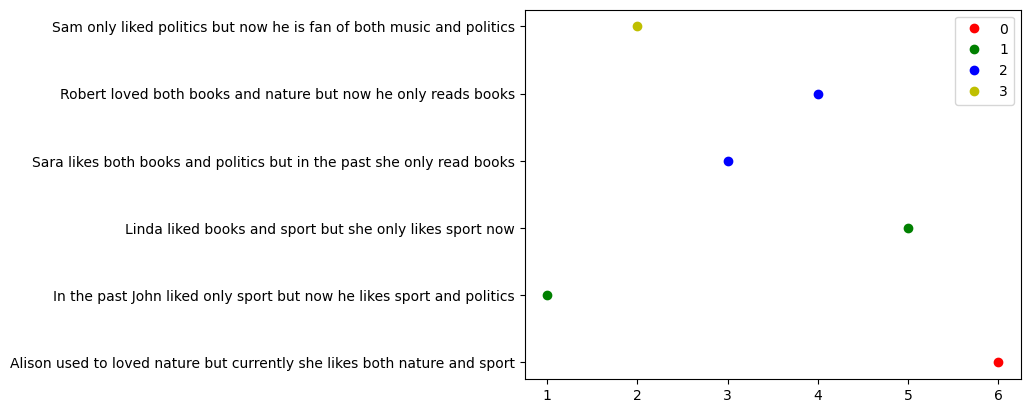

In [280]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(norm='l2') #TF-IDF
tfidf = v.fit_transform(corpus)

X = tfidf.toarray() #X has 6 values with 31 features each

print("List of features:")
print(v.get_feature_names_out())
print()

kmeans_tfidf = KMeans(n_clusters=k, init='k-means++', random_state=42)
y_kmeans = kmeans_tfidf.fit_predict(X) #try to group the values into 4 clusters based off features

X = df.iloc[:].values

df['cluster'] = y_kmeans

print("Clusters:", y_kmeans)
print()

#print(df, X)

plt.plot(X[y_kmeans==0, 0], X[y_kmeans==0, 1], "ro", label="0")
plt.plot(X[y_kmeans==1, 0], X[y_kmeans==1, 1], "go", label="1")
plt.plot(X[y_kmeans==2, 0], X[y_kmeans==2, 1], "bo", label="2")
plt.plot(X[y_kmeans==3, 0], X[y_kmeans==3, 1], "yo", label="3")
plt.legend()
plt.show()

For TF-IDF clustering:

1 ['In', 'the', 'past', 'John', 'liked', 'only', 'sport', 'but', 'now', 'he', 'likes', 'sport', 'and', 'politics', 'Linda', 'liked', 'books', 'and', 'sport', 'but', 'she', 'only', 'likes', 'sport', 'now']
3 ['Sam', 'only', 'liked', 'politics', 'but', 'now', 'he', 'is', 'fan', 'of', 'both', 'music', 'and', 'politics']
2 ['Sara', 'likes', 'both', 'books', 'and', 'politics', 'but', 'in', 'the', 'past', 'she', 'only', 'read', 'books', 'Robert', 'loved', 'both', 'books', 'and', 'nature', 'but', 'now', 'he', 'only', 'reads', 'books']
0 ['Alison', 'used', 'to', 'loved', 'nature', 'but', 'currently', 'she', 'likes', 'both', 'nature', 'and', 'sport']


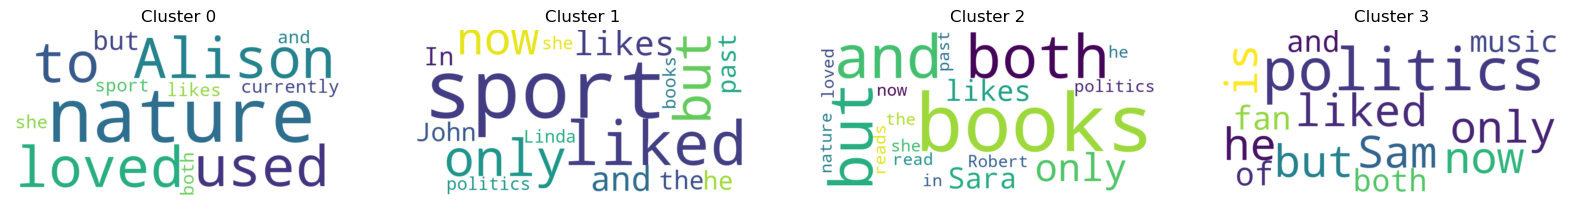

In [281]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

cluster_words = {} #{cluster# : [words in cluster]}

# Loop through each sentence and its cluster label
for sentence, cluster_label in zip(sentences, y_kmeans):

    # Add the words in the sentence to the list (ensure list exists), Counter will get frequency later
    words = cluster_words.get(cluster_label, [])
    words.extend(sentence.split(' '))

    cluster_words[cluster_label] = words

print("For TF-IDF clustering:")
print()
for cluster_label, words in cluster_words.items():
    print(cluster_label, words)

plt.figure(figsize=(20, 5))

# Loop through each cluster and its words
for cluster_label, words in cluster_words.items():
    # Create a WordCloud object with words in the cluster
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(Counter(words)))
    # Plot the WordCloud
    plt.subplot(1, k, cluster_label+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Cluster {}'.format(cluster_label))

# Show the plot
plt.show()

List of features:
['past', 'john', 'like', 'sport', 'polit', 'sam', 'fan', 'music', 'sara', 'book', 'read', 'robert', 'love', 'natur', 'linda', 'alison', 'use', 'current']

Bag of Words (frequency matrix):
[[1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1]]

Clusters: [1 3 1 2 1 0]



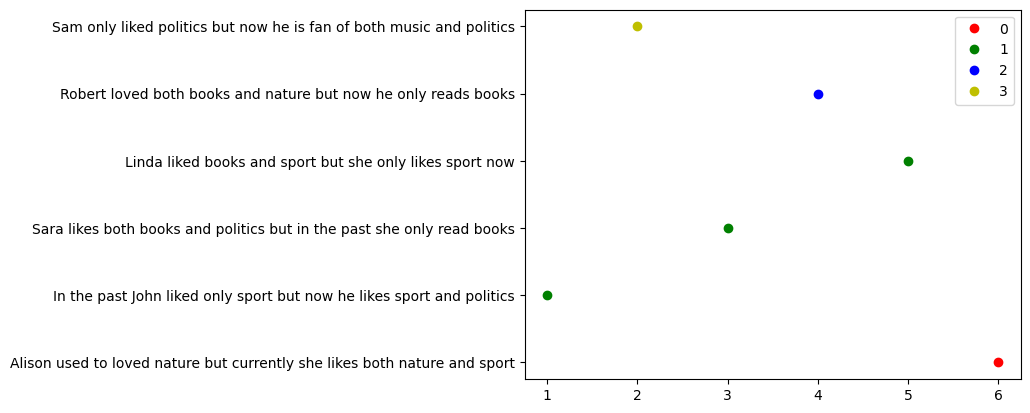

In [282]:
##Bag Of Words
# convert collection of text document into a matrix of numerical features, each feature corresponds to a unique word in the vocabulary, and the value is the frequency

#get frequency
freq = {}
for sentence in corpus:
    words = nltk.word_tokenize(sentence)
    for word in words:
        freq[word] = 1 + freq.get(word, 0) 

#for each word, check if it is present in the sentence or not, append 1 if present, else 0

all_words = list(freq.keys())
X = []

print("List of features:")
print(all_words)
print()

for sentence in corpus:
    present = []
    words = nltk.word_tokenize(sentence)
    for word in all_words:
        present.append(1) if word in words else present.append(0)
    X.append(present)
    
#X = pd.DataFrame(np.asarray(X), columns=all_words)
X = np.asarray(X) #just need the values

kmeans_bow = KMeans(n_clusters=k, init='k-means++', random_state=42)
y_kmeans = kmeans_bow.fit_predict(X)

print("Bag of Words (frequency matrix):")
print(X)
print()

X = df.iloc[:].values

df['cluster'] = y_kmeans

print("Clusters:", y_kmeans)
print()

#print(df, X)

plt.plot(X[y_kmeans==0, 0], X[y_kmeans==0, 1], "ro", label="0")
plt.plot(X[y_kmeans==1, 0], X[y_kmeans==1, 1], "go", label="1")
plt.plot(X[y_kmeans==2, 0], X[y_kmeans==2, 1], "bo", label="2")
plt.plot(X[y_kmeans==3, 0], X[y_kmeans==3, 1], "yo", label="3")
plt.legend()
plt.show()

For Bag Of Words clustering:

1 ['In', 'the', 'past', 'John', 'liked', 'only', 'sport', 'but', 'now', 'he', 'likes', 'sport', 'and', 'politics', 'Linda', 'liked', 'books', 'and', 'sport', 'but', 'she', 'only', 'likes', 'sport', 'now']
2 ['Sam', 'only', 'liked', 'politics', 'but', 'now', 'he', 'is', 'fan', 'of', 'both', 'music', 'and', 'politics']
0 ['Sara', 'likes', 'both', 'books', 'and', 'politics', 'but', 'in', 'the', 'past', 'she', 'only', 'read', 'books', 'Robert', 'loved', 'both', 'books', 'and', 'nature', 'but', 'now', 'he', 'only', 'reads', 'books']
3 ['Alison', 'used', 'to', 'loved', 'nature', 'but', 'currently', 'she', 'likes', 'both', 'nature', 'and', 'sport']


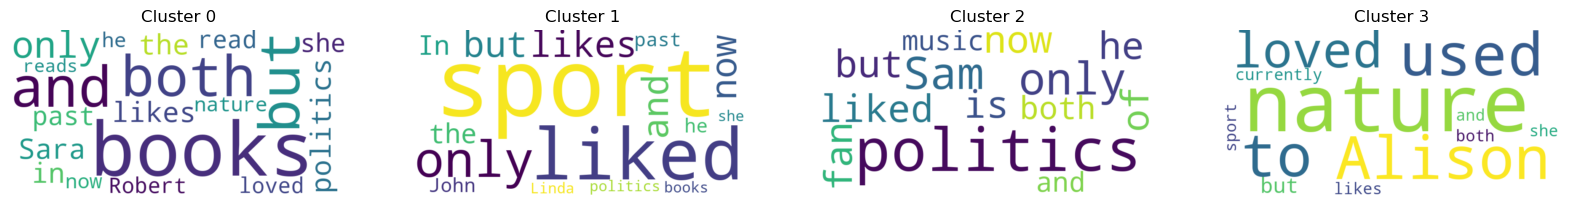

In [291]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

cluster_words = {} #{cluster# : [words in cluster]}

# Loop through each sentence and its cluster label
for sentence, cluster_label in zip(sentences, y_kmeans):

    # Add the words in the sentence to the list (ensure list exists), Counter will get frequency later
    words = cluster_words.get(cluster_label, [])
    words.extend(sentence.split(' '))

    cluster_words[cluster_label] = words

print("For Bag Of Words clustering:")
print()
for cluster_label, words in cluster_words.items():
    print(cluster_label, words)

plt.figure(figsize=(20, 5))

# Loop through each cluster and its words
for cluster_label, words in cluster_words.items():
    # Create a WordCloud object with words in the cluster
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(Counter(words)))
    # Plot the WordCloud
    plt.subplot(1, k, cluster_label+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Cluster {}'.format(cluster_label))

# Show the plot
plt.show()

In [284]:
#this one clusters for each feature, not for each sentence
#the code below clusters for each sentence

# from gensim.models import Word2Vec #for word2vec

# #Word2Vec needs custom corpus: sentance = [[word], [word], ...]

# w2vCorpus = []
# for sentence in sentences:
#     sentence = sentence.lower()
#     words = word_tokenize(sentence) # split sentence into words
    
#     #Stemming - also switches to root word
#     words = [stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]

#     #Lemmatize - swich word to base root word
#     words = [lemmatizer.lemmatize(word) for word in words]
    
#     #dont join words
#     w2vCorpus.append(words)
    
# v = Word2Vec(w2vCorpus, min_count=1)
# X = v.wv.get_normed_vectors()
# #X = v.wv.vectors
# features = [w for w in v.wv.key_to_index]

# print("List of features:")
# print(features)
# print()

# kmeans_w2v = KMeans(n_clusters=k, init='k-means++', random_state=42)
# y_kmeans = kmeans_w2v.fit_predict(X) #try to group the values into 4 clusters based off features

# print(X, len(X), len(X[0]))
# y_kmeans

# # X = df.iloc[:].values

# # df['cluster'] = y_kmeans

# # print("Clusters:", y_kmeans)
# # print()

# # #print(df, X)

# # plt.plot(X[y_kmeans==0, 0], X[y_kmeans==0, 1], "ro", label="0")
# # plt.plot(X[y_kmeans==1, 0], X[y_kmeans==1, 1], "go", label="1")
# # plt.plot(X[y_kmeans==2, 0], X[y_kmeans==2, 1], "bo", label="2")
# # plt.plot(X[y_kmeans==3, 0], X[y_kmeans==3, 1], "yo", label="3")
# # plt.legend()
# # plt.show()


{'like': 0, 'sport': 1, 'book': 2, 'polit': 3, 'natur': 4, 'past': 5, 'love': 6, 'read': 7, 'fan': 8, 'john': 9, 'sam': 10, 'current': 11, 'music': 12, 'use': 13, 'robert': 14, 'linda': 15, 'alison': 16, 'sara': 17}
List of features:
['like', 'sport', 'book', 'polit', 'natur', 'past', 'love', 'read', 'fan', 'john', 'sam', 'current', 'music', 'use', 'robert', 'linda', 'alison', 'sara']

Clusters: [1 2 0 0 1 3]



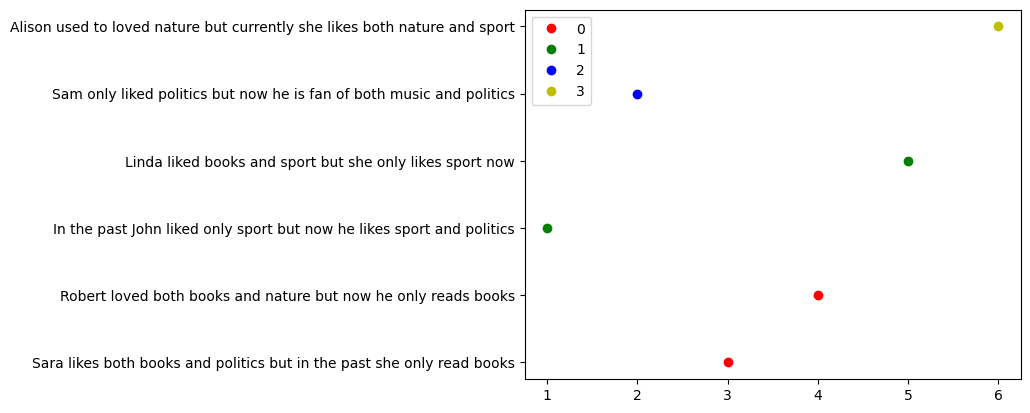

In [298]:
from gensim.models import Word2Vec #for word2vec

#Word2Vec needs custom corpus: sentance = [[word], [word], ...]

w2vCorpus = []
for sentence in sentences:
    sentence = sentence.lower()
    words = word_tokenize(sentence) # split sentence into words
    
    #Stemming - also switches to root word
    words = [stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]

    #Lemmatize - swich word to base root word
    words = [lemmatizer.lemmatize(word) for word in words]
    
    #dont join words
    w2vCorpus.append(words)

v = Word2Vec(w2vCorpus, min_count=1)
words = v.wv.key_to_index

print(words)
#print(v.wv[0])

# Create a dictionary to store the sentence vectors
sentence_vectors = {}

#this essentially creates a Bag-Of-Words for each sentence
#use the weights from the w2v model to create a BOW and cluster the sentences
for sentence in w2vCorpus:
    #print(sentence)
    # Initialize an empty vector for the sentence
    vector = np.zeros((v.vector_size,))

    for word in sentence:
        # Check if the word is in the vocabulary
        if word in words:
            # Add the word vector to the sentence vector
            vector += v.wv[word]
            
    # Add the sentence vector to the dictionary
    sentence_vectors[' '.join(sentence)] = vector

#print(sentence_vectors)

#print(sentence_vectors)
X = np.array(list(sentence_vectors.values()))
features = [w for w in words]

print("List of features:")
print(features)
print()

kmeans_w2v = KMeans(n_clusters=k, init='k-means++', random_state=42)
y_kmeans = kmeans_w2v.fit_predict(X) #try to group the values into 4 clusters based off features

X = df.iloc[:].values

df['cluster'] = y_kmeans

print("Clusters:", y_kmeans)
print()

#print(df, X)

plt.plot(X[y_kmeans==0, 0], X[y_kmeans==0, 1], "ro", label="0")
plt.plot(X[y_kmeans==1, 0], X[y_kmeans==1, 1], "go", label="1")
plt.plot(X[y_kmeans==2, 0], X[y_kmeans==2, 1], "bo", label="2")
plt.plot(X[y_kmeans==3, 0], X[y_kmeans==3, 1], "yo", label="3")
plt.legend()
plt.show()

For Word2Vec clustering:

1 ['In', 'the', 'past', 'John', 'liked', 'only', 'sport', 'but', 'now', 'he', 'likes', 'sport', 'and', 'politics', 'Linda', 'liked', 'books', 'and', 'sport', 'but', 'she', 'only', 'likes', 'sport', 'now']
2 ['Sam', 'only', 'liked', 'politics', 'but', 'now', 'he', 'is', 'fan', 'of', 'both', 'music', 'and', 'politics']
0 ['Sara', 'likes', 'both', 'books', 'and', 'politics', 'but', 'in', 'the', 'past', 'she', 'only', 'read', 'books', 'Robert', 'loved', 'both', 'books', 'and', 'nature', 'but', 'now', 'he', 'only', 'reads', 'books']
3 ['Alison', 'used', 'to', 'loved', 'nature', 'but', 'currently', 'she', 'likes', 'both', 'nature', 'and', 'sport']


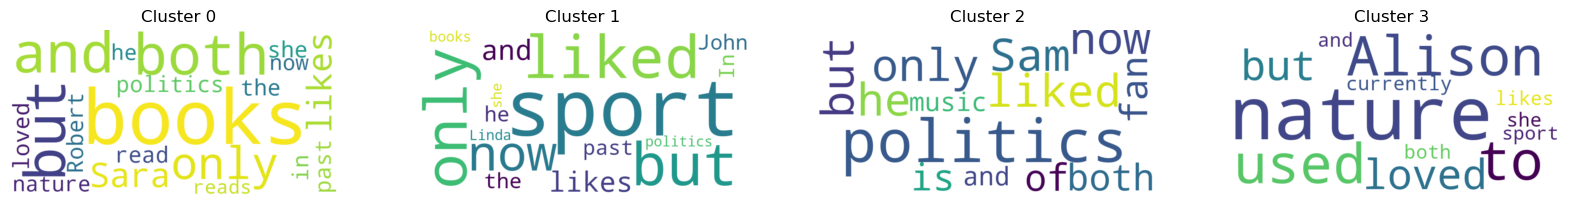

In [286]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

cluster_words = {} #{cluster# : [words in cluster]}

# Loop through each sentence and its cluster label
for sentence, cluster_label in zip(sentences, y_kmeans):

    # Add the words in the sentence to the list (ensure list exists), Counter will get frequency later
    words = cluster_words.get(cluster_label, [])
    words.extend(sentence.split(' '))

    cluster_words[cluster_label] = words

print("For Word2Vec clustering:")
print()
for cluster_label, words in cluster_words.items():
    print(cluster_label, words)

plt.figure(figsize=(20, 5))

# Loop through each cluster and its words
for cluster_label, words in cluster_words.items():
    # Create a WordCloud object with words in the cluster
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(Counter(words)))
    # Plot the WordCloud
    plt.subplot(1, k, cluster_label+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Cluster {}'.format(cluster_label))

# Show the plot
plt.show()